# Introduction of PRII 3.0 at Seoul
PRII(Pandemic Risk of Infection Index, 판데믹 감염 위험 지수)는 미세먼지처럼 지역의 팬데믹 감염 위험도를 나타낼 수는 없을까? 라는 질문에서 출발한 데이터 분석 시도입니다. 3.0 버전은 기존 [PRII2.0](https://colab.research.google.com/drive/16UI5UF3E1JS5IOrAf78ckcub0bonmXCS?usp=sharing) 에서 분포 분석으로 위험도 기준을 설정한 것입니다.

이 notebook은 코드 작동 순서와 같이 세 가지 섹션으로 나뉘어져 있습니다.


1.   지역별 일일확진자수 수준 비슷하게 맞추기
2.   위험도 산출
3.   위험도 시각화하기





# 1. 지역별 일일확진자수 수준 비슷하게 맞추기
서울시의 천명 당 누적 확진자수 데이터를 이용해 선형회귀함수를 도출하고 그 함수를 이용해 지역별 일일 확진자수 수준을 비슷하게 맞췄습니다.


In [ ]:
import pandas as pd

#서울시의 천명 당 확진자수 데이터

xdic={11: 5768, 12: 588, 13: 7149, 14: 1017, 15: 509, 16: 423, 17: 157, 18: 78, 19: 5091, 20: 246, 21 : 184, 22: 522, 23: 160, 24: 179, 25: 1578, 26: 301, 27: 59}
ydic={11: 969, 12: 339, 13: 242, 14: 294, 15: 145, 16: 146, 17:113, 18: 34, 19: 1338, 20: 154, 21: 159, 22: 212, 23: 18, 24: 185, 25: 264, 26: 334, 27: 67}


p = xdic.values()
pp = list(p)

d = ydic.values()
l = list(d)

No handles with labels found to put in legend.


<Figure size 864x720 with 0 Axes>

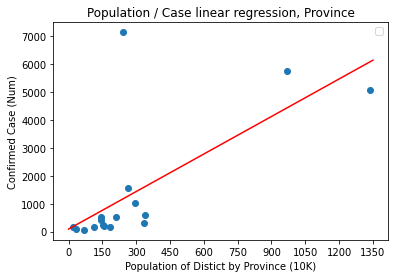

The equation of regression line is y=4.486x+89.377.


In [ ]:
#연도별 Co2 어쩌고 코드를 그대로 쓰다 보니 코드가 좀 지저분합니다.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12,10))

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
year=np.array(l)
co2=np.array(pp)
year1=year.reshape((-1,1))
reg = LinearRegression().fit(year1,co2) 
slope=reg.coef_[0]
intercept=reg.intercept_
plt.scatter(year,co2)
X_plot = np.linspace(0,1350,10)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.title("Population / Case linear regression, Province")
plt.xlabel('Population of Distict by Province (10K)')
plt.ylabel('Confirmed Case (Num)')
plt.legend()
plt.show()
print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')

여기서 나온 일차함수의 y절편이 음수였으면 애매해질 뻔 했습니다... 이 부분은 별 대책이 없네요. 누적확진자 7000명으로 나온 저기가 대구인데, 대구를 빼고 회귀를 돌리면 y절편이 음수가 나옵니다..

In [ ]:
#서울시청 데이터 가져오기

import pandas as pd
import time

start = time.time()

#서울시청 데이터를 크롤링해서 전처리 한 후 서버에 csv로 올려 놓은 것.
seoul_cityhall = 'https://hanparkinfo.cafe24.com/checkandgo/covidData/seoulCovidData.csv'
df_all = pd.read_csv(seoul_cityhall, encoding='utf-8')
print(time.time()-start)
df_all_2 = df_all.set_index('date2')
df_all_2

1.5480599403381348


,Gangseo,Jongro,Jung,Yongsan,Seongdong,Gwangjin,Dongdaemun,Jungrang,Seongbuk,Gangbuk,Dobong,Nohone,Eunpyeong,Seodaemun,Mapo,Yangcheon,Guro,Geumcheon,Yeongdeungpo,Dongjak,Gwanak,Seocho,Gangnam,Songpa,Gangdong
date2,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,12.0,1.0,2.0,1.0,7.0,2.0,4.0,2.0,7.0,1.0,6.0,3.0,3.0,0.0,2.0,2.0,3.0,0.0,3.0,7.0,0.0,8.0,4.0,6.0,1.0
2020-11-18,3.0,1.0,2.0,1.0,5.0,1.0,2.0,0.0,7.0,1.0,11.0,8.0,4.0,5.0,4.0,1.0,1.0,1.0,7.0,7.0,1.0,9.0,6.0,8.0,6.0
2020-11-19,7.0,2.0,4.0,5.0,2.0,0.0,9.0,1.0,6.0,3.0,8.0,7.0,3.0,4.0,3.0,3.0,1.0,0.0,3.0,5.0,1.0,15.0,3.0,10.0,0.0


In [ ]:
import numpy as np

# 1만명 단위, 출처 2020 2/4분기 서울시 빅데이터담당관

#100만명 단위로 변경.

population = { 'Gangseo' : 59.32, 'Jongro' : 16.05, 'Jung' : 13.60, 'Yongsan' : 24.53,  'Seongdong' : 30.48,  'Gwangjin' : 36.39, 'Dongdaemun' : 36.03,  'Jungrang' : 39.94,'Seongbuk' : 45.29,  'Gangbuk' : 31.53 , 'Dobong' : 33.17 , 'Nohone' : 53.30 ,  'Eunpyeong' : 48.39,  'Seodaemun' : 32.42,  'Mapo' : 38.49, 'Yangcheon' : 46.20,  'Guro' : 43.67, 'Geumcheon' : 25.05,  'Yeongdeungpo' : 40.51 ,  'Dongjak' : 40.67 , 'Gwanak' : 51.63 ,  'Seocho' : 43.30 , 'Gangnam' : 54.61,  'Songpa' : 67.80,  'Gangdong' : 46.15}

val = list(population.values())
val

regression = [(6.150 * x -32.876) / 100 for x in val]
regression
regression2 = list(np.round(regression, 2))
regression2

key = list(population.keys())
key

pccreg = {name : value for name, value in zip(key, regression2)}

pccreg

{'Dobong': 1.71,
 'Dongdaemun': 1.89,
 'Dongjak': 2.17,
 'Eunpyeong': 2.65,
 'Gangbuk': 1.61,
 'Gangdong': 2.51,
 'Gangnam': 3.03,
 'Gangseo': 3.32,
 'Geumcheon': 1.21,
 'Guro': 2.36,
 'Gwanak': 2.85,
 'Gwangjin': 1.91,
 'Jongro': 0.66,
 'Jung': 0.51,
 'Jungrang': 2.13,
 'Mapo': 2.04,
 'Nohone': 2.95,
 'Seocho': 2.33,
 'Seodaemun': 1.67,
 'Seongbuk': 2.46,
 'Seongdong': 1.55,
 'Songpa': 3.84,
 'Yangcheon': 2.51,
 'Yeongdeungpo': 2.16,
 'Yongsan': 1.18}

In [ ]:
# Popoluation / Confirmed Case 로 그래프 진폭 수준 맞춘 Column 추가

for i in pccreg :
    df_all_2[i+'_Reg'] = df_all_2[i].div(pccreg.get(i))

df_all_2.tail(100)

,Gangseo,Jongro,Jung,Yongsan,Seongdong,Gwangjin,Dongdaemun,Jungrang,Seongbuk,Gangbuk,Dobong,Nohone,Eunpyeong,Seodaemun,Mapo,Yangcheon,Guro,Geumcheon,Yeongdeungpo,Dongjak,Gwanak,Seocho,Gangnam,Songpa,Gangdong,Gangseo_Reg,Jongro_Reg,Jung_Reg,Yongsan_Reg,Seongdong_Reg,Gwangjin_Reg,Dongdaemun_Reg,Jungrang_Reg,Seongbuk_Reg,Gangbuk_Reg,Dobong_Reg,Nohone_Reg,Eunpyeong_Reg,Seodaemun_Reg,Mapo_Reg,Yangcheon_Reg,Guro_Reg,Geumcheon_Reg,Yeongdeungpo_Reg,Dongjak_Reg,Gwanak_Reg,Seocho_Reg,Gangnam_Reg,Songpa_Reg,Gangdong_Reg
date2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-14,2.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,16.0,0.0,1.0,4.0,1.0,3.0,6.0,1.0,0.0,0.0,2.0,2.0,2.0,8.0,5.0,6.0,5.0,0.602410,0.000000,1.960784,0.847458,0.645161,0.523560,1.587302,0.469484,6.504065,0.000000,0.584795,1.355932,0.377358,1.796407,2.941176,0.398406,0.000000,0.000000,0.925926,0.921659,0.701754,3.433476,1.650165,1.562500,1.992032
2020-08-15,6.0,0.0,0.0,4.0,1.0,7.0,7.0,8.0,38.0,9.0,8.0,13.0,5.0,1.0,0.0,2.0,0.0,3.0,2.0,1.0,6.0,2.0,3.0,6.0,2.0,1.807229,0.000000,0.000000,3.389831,0.645161,3.664921,3.703704,3.755869,15.447154,5.590062,4.678363,4.406780,1.886792,0.598802,0.000000,0.796813,0.000000,2.479339,0.925926,0.460829,2.105263,0.858369,0.990099,1.562500,0.796813
2020-08-16,5.0,2.0,1.0,3.0,1.0,3.0,4.0,5.0,19.0,2.0,4.0,14.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,5.0,1.506024,3.030303,1.960784,2.542373,0.645161,1.570681,2.116402,2.347418,7.723577,1.242236,2.339181,4.745763,0.754717,0.000000,1.960784,0.398406,0.000000,0.000000,0.000000,0.460829,0.000000,0.000000,0.330033,2.343750,1.992032
2020-08-17,3.0,0.0,1.0,0.0,0.0,4.0,6.0,9.0,22.0,9.0,3.0,12.0,5.0,1.0,3.0,3.0,2.0,1.0,1.0,11.0,2.0,1.0,2.0,10.0,5.0,0.903614,0.000000,1.960784,0.000000,0.000000,2.094241,3.174603,4.225352,8.943089,5.590062,1.754386,4.067797,1.886792,0.598802,1.470588,1.195219,0.847458,0.826446,0.462963,5.069124,0.701754,0.429185,0.660066,2.604167,1.992032
2020-08-18,2.0,4.0,2.0,4.0,2.0,3.0,5.0,9.0,20.0,8.0,4.0,9.0,5.0,3.0,8.0,4.0,6.0,1.0,3.0,4.0,6.0,6.0,6.0,11.0,8.0,0.602410,6.060606,3.921569,3.389831,1.290323,1.570681,2.645503,4.225352,8.130081,4.968944,2.339181,3.050847,1.886792,1.796407,3.921569,1.593625,2.542373,0.826446,1.388889,1.843318,2.105263,2.575107,1.980198,2.864583,3.187251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,12.0,1.0,2.0,1.0,7.0,2.0,4.0,2.0,7.0,1.0,6.0,3.0,3.0,0.0,2.0,2.0,3.0,0.0,3.0,7.0,0.0,8.0,4.0,6.0,1.0,3.614458,1.515152,3.921569,0.847458,4.516129,1.047120,2.116402,0.938967,2.845528,0.621118,3.508772,1.016949,1.132075,0.000000,0.980392,0.796813,1.271186,0.000000,1.388889,3.225806,0.000000,3.433476,1.320132,1.562500,0.398406
2020-11-18,3.0,1.0,2.0,1.0,5.0,1.0,2.0,0.0,7.0,1.0,11.0,8.0,4.0,5.0,4.0,1.0,1.0,1.0,7.0,7.0,1.0,9.0,6.0,8.0,6.0,0.903614,1.515152,3.921569,0.847458,3.225806,0.523560,1.058201,0.000000,2.845528,0.621118,6.432749,2.711864,1.509434,2.994012,1.960784,0.398406,0.423729,0.826446,3.240741,3.225806,0.350877,3.862661,1.980198,2.083333,2.390438
2020-11-19,7.0,2.0,4.0,5.0,2.0,0.0,9.0,1.0,6.0,3.0,8.0,7.0,3.0,4.0,3.0,3.0,1.0,0.0,3.0,5.0,1.0,15.0,3.0,10.0,0.0,2.108434,3.030303,7.843137,4.237288,1.290323,0.000000,4.761905,0.469484,2.439024,1.863354,4.678363,2.372881,1.132075,2.395210,1.470588,1.195219,0.423729,0.000000,1.388889,2.304147,0.350877,6.437768,0.990099,2.604167,0.000000


In [ ]:
# 7일 이동평균한 column 추가

for i in population :
    
    df_all_2[i+'_MA7'] = df_all_2[i+'_Reg'].rolling(7).mean().shift()

# df_all_2.to_csv('Seoul MA7 REG.csv')
df_all_2



,Gangseo,Jongro,Jung,Yongsan,Seongdong,Gwangjin,Dongdaemun,Jungrang,Seongbuk,Gangbuk,Dobong,Nohone,Eunpyeong,Seodaemun,Mapo,Yangcheon,Guro,Geumcheon,Yeongdeungpo,Dongjak,Gwanak,Seocho,Gangnam,Songpa,Gangdong,Gangseo_Reg,Jongro_Reg,Jung_Reg,Yongsan_Reg,Seongdong_Reg,Gwangjin_Reg,Dongdaemun_Reg,Jungrang_Reg,Seongbuk_Reg,Gangbuk_Reg,Dobong_Reg,Nohone_Reg,Eunpyeong_Reg,Seodaemun_Reg,Mapo_Reg,Yangcheon_Reg,Guro_Reg,Geumcheon_Reg,Yeongdeungpo_Reg,Dongjak_Reg,Gwanak_Reg,Seocho_Reg,Gangnam_Reg,Songpa_Reg,Gangdong_Reg,Gangseo_MA7,Jongro_MA7,Jung_MA7,Yongsan_MA7,Seongdong_MA7,Gwangjin_MA7,Dongdaemun_MA7,Jungrang_MA7,Seongbuk_MA7,Gangbuk_MA7,Dobong_MA7,Nohone_MA7,Eunpyeong_MA7,Seodaemun_MA7,Mapo_MA7,Yangcheon_MA7,Guro_MA7,Geumcheon_MA7,Yeongdeungpo_MA7,Dongjak_MA7,Gwanak_MA7,Seocho_MA7,Gangnam_MA7,Songpa_MA7,Gangdong_MA7
date2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602410,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,12.0,1.0,2.0,1.0,7.0,2.0,4.0,2.0,7.0,1.0,6.0,3.0,3.0,0.0,2.0,2.0,3.0,0.0,3.0,7.0,0.0,8.0,4.0,6.0,1.0,3.614458,1.515152,3.921569,0.847458,4.516129,1.04712,2.116402,0.938967,2.845528,0.621118,3.508772,1.016949,1.132075,0.000000,0.980392,0.796813,1.271186,0.000000,1.388889,3.225806,0.000000,3.433476,1.320132,1.562500,0.398406,1.850258,0.865801,3.921569,1.331719,1.013825,0.299177,3.628118,0.737760,1.509872,0.443656,1.587302,1.646489,0.862534,1.454234,1.260504,0.626067,0.847458,0.472255,0.462963,0.789993,0.350877,1.655426,0.754361,1.785714,0.569152
2020-11-18,3.0,1.0,2.0,1.0,5.0,1.0,2.0,0.0,7.0,1.0,11.0,8

아래 그래프를 위험도 산출에서 메인으로 사용합니다. 

Text(0.5, 1.0, 'Daily MA7 Seoul 100')

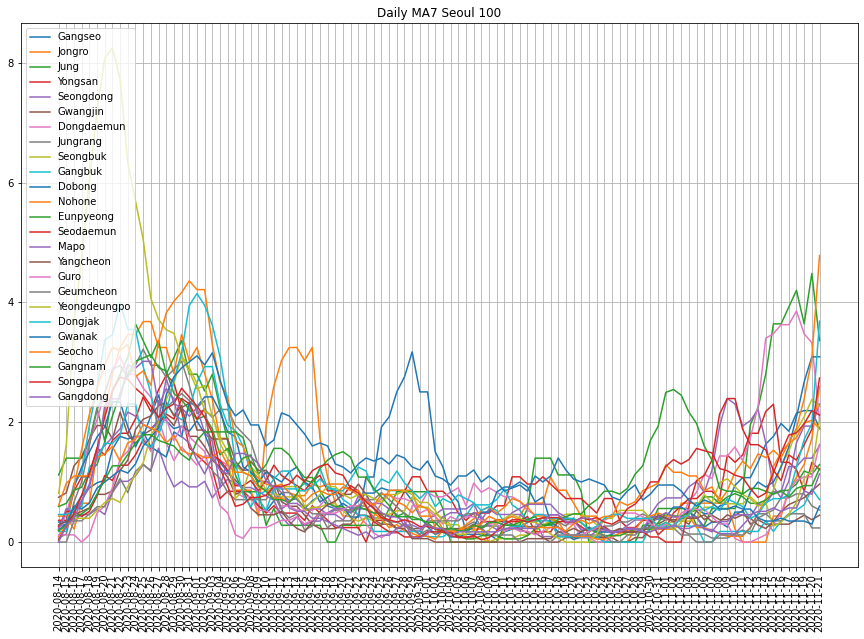

In [ ]:
import matplotlib.pyplot as plt

x = 100 # 이 값을 바꿔서 tail 조정하기
# x = len(df_all_2) # 이건 전체

plt.figure(figsize=(15, 10)) 

for i in population :
    plt.plot(df_all_2[i+'_MA7'].tail(x),label=str(i))

plt.grid(True)
# plt.axhline(y=max1, color='red', linestyle='dashed', label='max(excl outliers)')
plt.xticks(rotation='vertical')
plt.legend(loc=2)
plt.title("Daily MA7 Seoul "+str(x))

#2. 위험도 산출하기

위험도 산출을 위해서는 a) (수준만 맞춰진) 일일 확진환자 값의 그래프, b) 7일 이동평균 그래프, c) 7일 이동평균의 기울기 그래프 이렇게 세 가지 그래프를 사용합니다. 

그래프 a, b, c에 대하여:

1.   (이동평균되지 않은)일일 확진환자 값으로만 이루어진 DataFrame 만들기
2.   위 DataFrame으로 일일 확진환자 값에 대한 분포분석하여 대푯값 뽑아내기 <br>

그런 뒤 분포분석에서 얻은 대푯값을 기준으로 그래프 a, b, c를 합쳐 위험도 산출







*   그래프 b의 대푯값 구하기



In [ ]:
#b) (수준만 맞춰진)  7일 이동평균으로만 이루어진 DataFrame 
# df_all_2.columns

df_reg_ma7 = df_all_2.iloc[:, 50:]
df_reg_ma7.columns

Index(['Gangseo_MA7', 'Jongro_MA7', 'Jung_MA7', 'Yongsan_MA7', 'Seongdong_MA7',
       'Gwangjin_MA7', 'Dongdaemun_MA7', 'Jungrang_MA7', 'Seongbuk_MA7',
       'Gangbuk_MA7', 'Dobong_MA7', 'Nohone_MA7', 'Eunpyeong_MA7',
       'Seodaemun_MA7', 'Mapo_MA7', 'Yangcheon_MA7', 'Guro_MA7',
       'Geumcheon_MA7', 'Yeongdeungpo_MA7', 'Dongjak_MA7', 'Gwanak_MA7',
       'Seocho_MA7', 'Gangnam_MA7', 'Songpa_MA7', 'Gangdong_MA7'],
      dtype='object')

In [ ]:
#최근 100일의 분포분석을 위한 전처리
x = 100
array = df_reg_ma7.tail(x).to_numpy()
array2 = np.ravel(array)
array2
array3 = np.round(array2, 3)
array3

array([0.258, 0.433, 1.12 , ..., 1.226, 2.121, 1.138])

1.4620000000000002
iqr: 0.929
max: 2.8555
평균: 0.9155984
표준편차: 0.895067787107457
40%: 0.46499999999999997


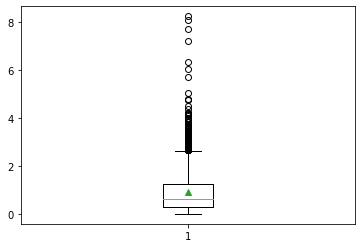

In [ ]:
data13 = array3

ma7_mean = data13.mean(axis=0)
ma7_st1 = data13.std(axis=0)

fig, ax = plt.subplots()
bp = ax.boxplot(data13, showmeans=True)

text = '3rd quartile: ' + str(np.percentile(data13, 75)) + '\n' + 'mean: ' + str(np.round(ma7_mean, 3))


print(np.percentile(data13, 80))

iqr = np.percentile(data13, 75) - np.percentile(data13, 25)
ma7_max1 = np.percentile(data13, 75) + iqr * 1.5
Q = np.percentile(data13, 75)
P2 = np.percentile(data13, 85)
ma7_P3 = np.percentile(data13, 95)
ma7_P40 = np.percentile(data13, 40)

print("iqr: "+str(iqr))

print("max: "+str(np.percentile(data13, 80) + iqr * 1.5))

print("평균: "+str(ma7_mean))
print("표준편차: "+str(ma7_st1))
print("40%: "+str(ma7_P40))

위에서의 최댓값(max, Q3 + 1.5 IQR), 40백분위수, 평균을 기준선으로 사용합니다. <br>
아까 봤던 그래프 위에 얹어보면 이렇게 됩니다.

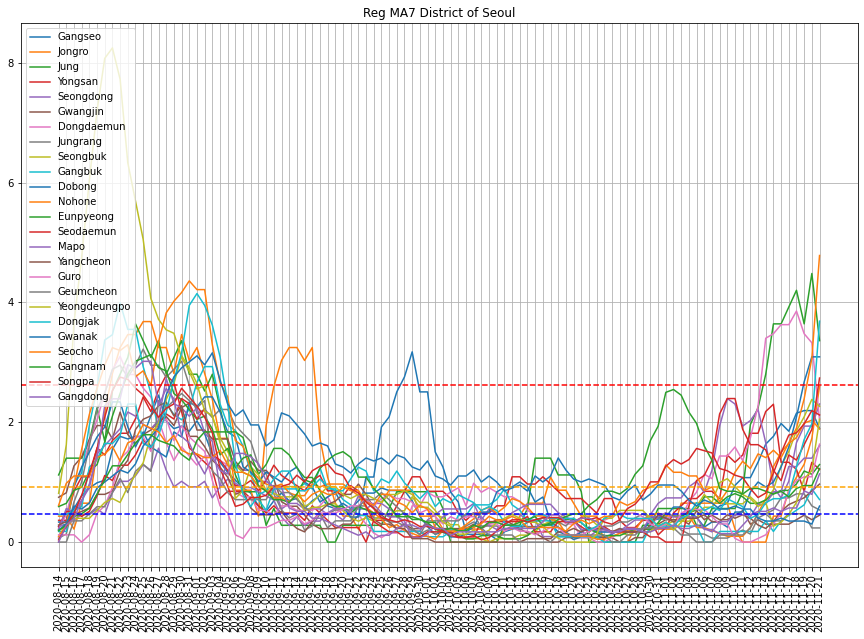

In [ ]:
x = 100 # 이 값을 바꿔서 tail 조정하기
# x = len(df_ma7) # 이건 전체

plt.figure(figsize=(15, 10)) #size 지정은 line개수가 비정상적으로 많아서 오류 나는듯

for i in population :
    plt.plot(df_all_2[i+'_MA7'].tail(x),label=str(i))

plt.grid(True)
plt.xticks(rotation='vertical')
plt.legend(loc=2)
plt.title(label='Reg MA7 District of Seoul')
plt.axhline(y=ma7_P40, color='blue', linestyle='dashed', label='40%')
plt.axhline(y=ma7_mean, color='orange', linestyle='dashed', label='mean')
plt.axhline(y=ma7_max1, color='red', linestyle='dashed', label='max(excl outliers)')
# plt.axhline(y=ma7_P3, color='black', linestyle='dashed', label='95%')
# plt.axhline(y=0.5, color='r', linestyle='-')



*   그래프 c 만들기



In [ ]:
# 그래프 c는 그래프 b의 일일 변화량.
for i in population:
    df_all_2[i+'_MA_D'] = (df_all_2[i+'_MA7'] - df_all_2[i+'_MA7'].shift())

Text(0.5, 1.0, ' Reg MA_D District of Seoul')

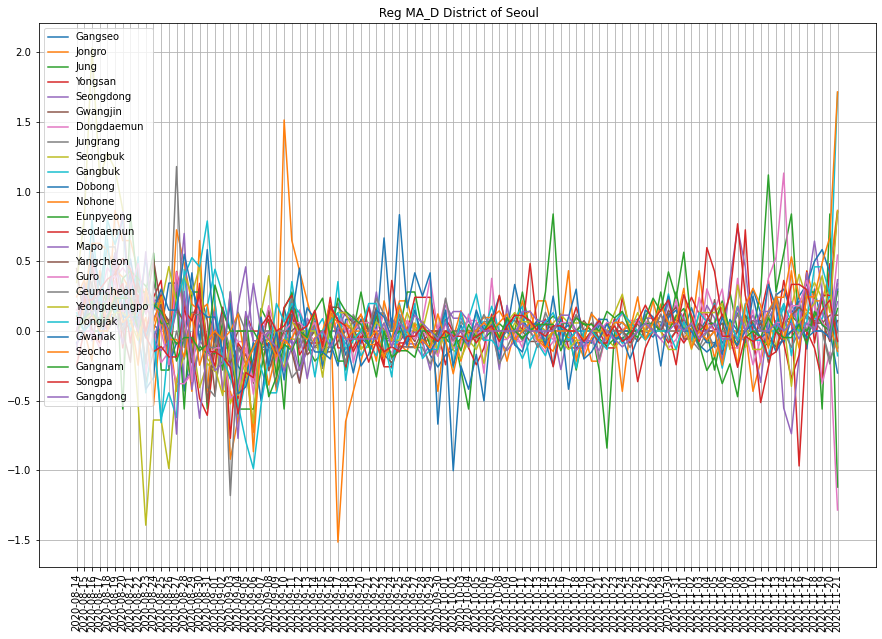

In [ ]:
#그래프 c 차트
x = 100 # 이 값을 바꿔서 tail 조정하기
# x = len(df_reg) # 이건 전체

plt.figure(figsize=(15, 10)) #size 지정은 line개수가 비정상적으로 많아서 오류 나는듯

for i in population :
    plt.plot(df_all_2[i+'_MA_D'].tail(x),label=str(i))

plt.grid(True)
plt.xticks(rotation='vertical')
plt.legend(loc=2)
plt.title(label=' Reg MA_D District of Seoul')



*   그래프 a의 대푯값 구하기 <br>
그래프 b만 사용하면 확진자 급증에 대한 반응이 둔하기 때문에 그걸 보정하기 위해서 일일 확진환자수가 최근 100일 기준으로 이상치에 해당하면 '매우 위험'으로 판단하게 합니다.



In [ ]:
#데이터프레임 만들기
df_all_2.columns

df_reg_raw = df_all_2.iloc[:, 25:50]

In [ ]:
x = 100
array = df_reg_raw.tail(x).to_numpy()
array2 = np.ravel(array)
array2
array3 = np.round(array2, 3)
array3

array([0.602, 0.   , 1.961, ..., 4.62 , 3.906, 2.39 ])

1.695
max: 3.729


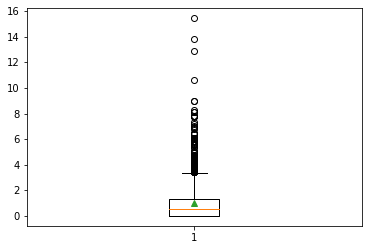

In [ ]:
#여기서는 아래 max 값만 사용합니다.

data13 = array3

mean = data13.mean(axis=0)
st1 = data13.std(axis=0)

fig, ax = plt.subplots()
bp = ax.boxplot(data13, showmeans=True)

text = '3rd quartile: ' + str(np.percentile(data13, 75)) + '\n' + 'mean: ' + str(np.round(mean, 3))
# ax.annotate(text, xy=(x, y))

print(np.percentile(data13, 80))

iqr = np.percentile(data13, 75) - np.percentile(data13, 25)
max1 = np.percentile(data13, 75) + iqr * 1.5


print("max: "+str(np.percentile(data13, 80) + iqr * 1.5))

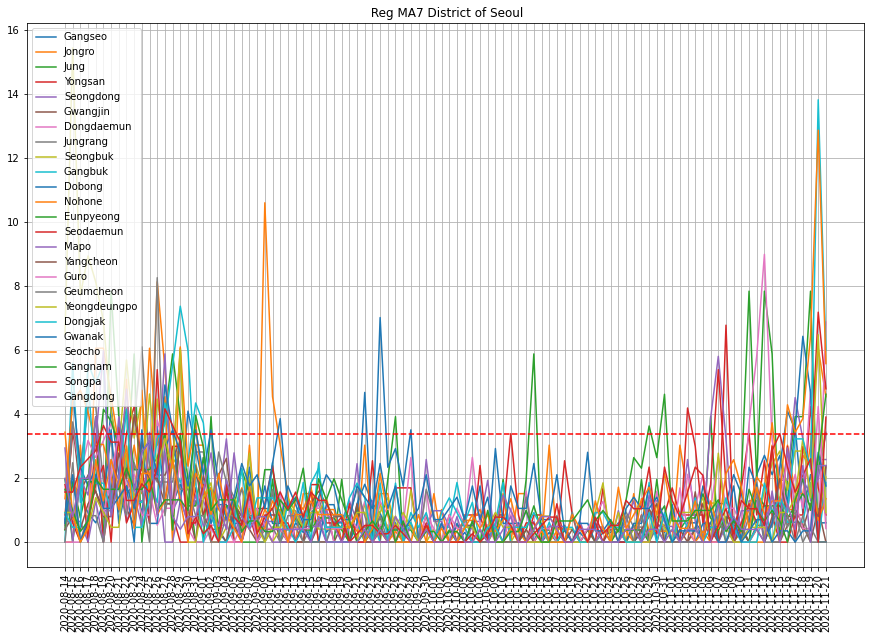

In [ ]:
x = 100 # 이 값을 바꿔서 tail 조정하기
# x = len(df_reg) # 이건 전체

plt.figure(figsize=(15, 10))

for i in population :
    plt.plot(df_all_2[i+'_Reg'].tail(x),label=str(i))

plt.grid(True)
plt.xticks(rotation='vertical')
plt.legend(loc=2)
plt.title(label=' Reg MA7 District of Seoul')
plt.axhline(y=max1, color='red', linestyle='dashed', label='max(excl outliers)')

**아래는 위험도 산출 코드**

In [ ]:
for i in population :

    for j, row in df_all_2.iterrows():

        if df_all_2.at[j, str(i + '_Reg')] >= max1 :
            df_all_2.at[j, str(i + '_Prii')] = 3


        elif df_all_2.at[j, str(i + '_MA7')] >= ma7_max1 :
            df_all_2.at[j, str(i + '_Prii')] = 3  

        elif df_all_2.at[j, str(i + '_MA7')] >= ma7_mean:                
            if df_all_2.at[j, str(i + '_MA_D')] >= 0:
                df_all_2.at[j, str(i + '_Prii')] = 3
            else:
                df_all_2.at[j, str(i + '_Prii')] = 2


        elif df_all_2.at[j, str(i + '_MA7')] >= ma7_P40:
            if df_all_2.at[j, str(i + '_MA_D')] >= 0:
                df_all_2.at[j, str(i + '_Prii')] = 2
            else:
                df_all_2.at[j, str(i + '_Prii')] = 1

        else:
            df_all_2.at[j, str(i + '_Prii')] = 1    

df_all_2

,Gangseo,Jongro,Jung,Yongsan,Seongdong,Gwangjin,Dongdaemun,Jungrang,Seongbuk,Gangbuk,Dobong,Nohone,Eunpyeong,Seodaemun,Mapo,Yangcheon,Guro,Geumcheon,Yeongdeungpo,Dongjak,Gwanak,Seocho,Gangnam,Songpa,Gangdong,Gangseo_Reg,Jongro_Reg,Jung_Reg,Yongsan_Reg,Seongdong_Reg,Gwangjin_Reg,Dongdaemun_Reg,Jungrang_Reg,Seongbuk_Reg,Gangbuk_Reg,Dobong_Reg,Nohone_Reg,Eunpyeong_Reg,Seodaemun_Reg,Mapo_Reg,...,Dobong_MA_D,Nohone_MA_D,Eunpyeong_MA_D,Seodaemun_MA_D,Mapo_MA_D,Yangcheon_MA_D,Guro_MA_D,Geumcheon_MA_D,Yeongdeungpo_MA_D,Dongjak_MA_D,Gwanak_MA_D,Seocho_MA_D,Gangnam_MA_D,Songpa_MA_D,Gangdong_MA_D,Gangseo_Prii,Jongro_Prii,Jung_Prii,Yongsan_Prii,Seongdong_Prii,Gwangjin_Prii,Dongdaemun_Prii,Jungrang_Prii,Seongbuk_Prii,Gangbuk_Prii,Dobong_Prii,Nohone_Prii,Eunpyeong_Prii,Seodaemun_Prii,Mapo_Prii,Yangcheon_Prii,Guro_Prii,Geumcheon_Prii,Yeongdeungpo_Prii,Dongjak_Prii,Gwanak_Prii,Seocho_Prii,Gangnam_Prii,Songpa_Prii,Gangdong_Prii
date2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602410,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,12.0,1.0,2.0,1.0,7.0,2.0,4.0,2.0,7.0,1.0,6.0,3.0,3.0,0.0,2.0,2.0,3.0,0.0,3.0,7.0,0.0,8.0,4.0,6.0,1.0,3.614458,1.515152,3.921569,0.847458,4.516129,1.04712,2.116402,0.938967,2.845528,0.621118,3.508772,1.016949,1.132075,0.000000,0.980392,...,0.334169,0.145278,0.000000,0.427716,0.420168,0.113830,3.631961e-01,0.118064,0.132275,0.065833,-5.012531e-02,0.245248,-0.094295,0.297619,0.056915,3.0,2.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0
2020-11-18,3.0,1.0,2.0,1.0,5.0,1.0,2.0,0.0,7.0,1.0,11.0,8.0,4.0,5.0,4.0,1.0,1.0,1.0,7.0,7.0,1.0,9.0,6.0,8.0,6.0,0.903614

In [ ]:
#위험도 시각화하기

In [ ]:
df_prii = df_all_2.loc[:, df_all_2.columns.str.endswith('Prii')]

df_prii_ch = df_prii

df_prii_ch

p_dict_1 = {'종로구' : 'Jongro', '중구' : 'Jung', '용산구' : 'Yongsan', '성동구' : 'Seongdong', '광진구' : 'Gwangjin', '동대문구' : 'Dongdaemun', '중랑구' : 'Jungrang', '성북구' : 'Seongbuk', '강북구' : 'Gangbuk' , '도봉구' : 'Dobong' , '노원구' : 'Nohone' , '은평구' : 'Eunpyeong', '서대문구' : 'Seodaemun', '마포구' : 'Mapo', '양천구' : 'Yangcheon', '구로구' : 'Guro', '금천구' : 'Geumcheon', '영등포구' : 'Yeongdeungpo' , '동작구' : 'Dongjak' , '관악구' : 'Gwanak' , '서초구' : 'Seocho' , '강남구' : 'Gangnam' , '송파구' : 'Songpa', '강동구' : 'Gangdong', '강서구' : 'Gangseo'}

convert = {}

for k, v in p_dict_1.items():
    convert[v] = k
convert
for i in convert :

    df_prii_ch.rename(columns = {str(i +'_Prii') : convert.get(i)}, inplace = True)
    


df_prii_ch3 = df_prii_ch.reset_index()
df_prii_ch3
df_prii_ch_2 = df_prii_ch3.drop(['date2'], axis = 1)

df_prii_ch_2

day = 200 #임의의 예시 날

df3 = df_prii_ch_2.loc[day]
df3
df4 = df3.reset_index()
df4.columns = ['name', 'value']

df4

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,value
0,강서구,1.0
1,종로구,1.0
2,중구,1.0
3,용산구,2.0
4,성동구,1.0
5,광진구,1.0
6,동대문구,1.0
7,중랑구,1.0
8,성북구,1.0
9,강북구,1.0


#위험도 시각화하기
folium을 이용해서 choropleth map을 만듭니다.

In [ ]:
import folium

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
location=[37.566345, 126.977893],
tiles='CartoDB Positron',
zoom_start=10,)

m

In [ ]:
#어느 날에 대한 PRII 시각화

day = 302 #day는 서울시청에 데이터가 있기 시작한 날 부터 며칠
  
m = folium.Map(
location=[37.566345, 126.977893],
tiles='CartoDB Positron',
zoom_start=10,)

# df_prii_ch_2
df3 = df_prii_ch_2.loc[day]
df4 = df3.reset_index()
df4.columns = ['name', 'value']  

folium.Choropleth(
geo_data=geo_json,
name='choropleth',
data=df4,
columns=['name', 'value'],
key_on='feature.properties.name',
bins=9,
fill_color='OrRd',
fill_opacity=0.6,
line_opacity=1,
).add_to(m)

print(str(df_prii_ch3.date2[day]))
m

2020-11-21


In [ ]:
#아래는 시퀀스를 만들기 위한 코드

# for day in range(0, len(df_prii_ch_2)) :
    
#     m = folium.Map(
#     location=[37.566345, 126.977893],
#     tiles='CartoDB Positron',
#     zoom_start=10,)
    
#     # df_prii_ch_2
#     df3 = df_prii_ch_2.loc[day]
#     df4 = df3.reset_index()
#     df4.columns = ['name', 'value']  

#     folium.Choropleth(
#     geo_data=geo_json,
#     name='choropleth',
#     data=df4,
#     columns=['name', 'value'],
#     key_on='feature.properties.name',
#     bins=9,
#     fill_color='OrRd',
#     fill_opacity=0.6,
#     line_opacity=1,
#     ).add_to(m)

#     m

    # fn='pic6_seoul/prii3_seoul day_'+str(df_prii_ch3.date2[day])+'.html'

    # m.save(fn)
    
    # day = day + 1